# AIAP 16 Technical Assessment - Exploratory Data Analysis for Lung Cancer Dataset

## Table of Contents<a id='0'></a>

### [1. Introduction](#1)

- Problem Statement
- Data Description

### [2. Data Acquisition and Loading](#2)

- Notebook Setup
- Load Data


### [3. Data Cleaning and Processing](#3)

- Rename Columns and Convert Types
- Drop Duplicates
- Handling Null Values
- Handling Unusual Values and Ranges
- Simple Feature Engineering of Smoking Data

### [4. Data Analysis and Visualisation](#4)
- Analyses of Impact of Categorical Variables on Lung Cancer Occurrence
- Analyses of Impact of Numerical Variables on Lung Cancer Occurrence

### [5. Conclusions](#5)
- Insights
- Next Steps
---

## 1. Introduction<a id='1'></a>
[Return to Table of Contents](#0)

### Problem Statement

Lung cancer is a leading cause of cancer death, both worldwide and in Singapore. Early detection is crucial for improving survival rates, but current diagnostic methods can be expensive, time-consuming and prone to misinterpretation. There is merit, therefore, in exploring cheaper, ML-based approaches to determining if a given person is at risk of lung cancer using non-invasive sources of data such as genetic/phenotypic, lifestyle, and environmental factors. 

The intent of this notebook is to conduct an exploratory data analysis of a dataset of public hospital patients in Singapore to identify broad trends and set the stage for subsequent selection of features for building a predictive model.   



### Data Description

The dataset provided contains individual-level medical information on ~10k patients, collected from all public hospitals in Singapore. Data is de-identified and contains synthetic features to preserve anonymity. 

---

## 2. Data Acquisition and Loading<a id='2'></a>
[Return to Table of Contents](#0)

### 2a. Notebook Setup

In [1]:
# Load necessary packages for data ingestion, cleaning EDA 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy.stats import normaltest, chi2_contingency
from sqlalchemy import create_engine, MetaData, Table 

# Set Pandas options

%matplotlib inline
plt.rcParams['figure.figsize'] = [25,10]
plt.rcParams['font.size'] = 24
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 120)

### 2b. Load Data

In [2]:
# Load dataset using Sqlalchemy

engine = create_engine('sqlite:///data/lung_cancer.db')
conn = engine.connect()

# Reflect data
metadata = MetaData()
metadata.reflect(bind=engine)

# Convert to pandas df:
df = pd.read_sql_table('lung_cancer', con=engine)

In [3]:
# Show first 5 rows for visual inspection

df.head()

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,14681542544117760.00,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1271684316815736320.00,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1708068119984827904.00,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,355582900676614912.00,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1684597863357175296.00,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


In [5]:
metadata.tables

FacadeDict({'lung_cancer': Table('lung_cancer', MetaData(), Column('ID', REAL(), table=<lung_cancer>), Column('Age', INTEGER(), table=<lung_cancer>), Column('Gender', TEXT(), table=<lung_cancer>), Column('COPD History', TEXT(), table=<lung_cancer>), Column('Genetic Markers', TEXT(), table=<lung_cancer>), Column('Air Pollution Exposure', TEXT(), table=<lung_cancer>), Column('Last Weight', INTEGER(), table=<lung_cancer>), Column('Current Weight', INTEGER(), table=<lung_cancer>), Column('Start Smoking', TEXT(), table=<lung_cancer>), Column('Stop Smoking', TEXT(), table=<lung_cancer>), Column('Taken Bronchodilators', TEXT(), table=<lung_cancer>), Column('Frequency of Tiredness', TEXT(), table=<lung_cancer>), Column('Dominant Hand', TEXT(), table=<lung_cancer>), Column('Lung Cancer Occurrence', INTEGER(), table=<lung_cancer>), schema=None)})

### 2c. Basic Inspection

In [4]:
# Print index, shape, data types

print('\033[1m'+ "Index: " + '\033[0m', df.index)
print('\033[1m' + "Number of rows: " + '\033[0m', df.shape[0])
print('\033[1m' + "Number of columns: " + '\033[0m', df.shape[1])
print('\033[1m' + "Data Types:" + '\033[0m\n' + str(df.dtypes))

Index:  RangeIndex(start=0, stop=10348, step=1)
Number of rows:  10348
Number of columns:  14
Data Types:
ID                        float64
Age                         int64
Gender                     object
COPD History               object
Genetic Markers            object
Air Pollution Exposure     object
Last Weight                 int64
Current Weight              int64
Start Smoking              object
Stop Smoking               object
Taken Bronchodilators      object
Frequency of Tiredness     object
Dominant Hand              object
Lung Cancer Occurrence      int64
dtype: object


In [5]:
# Check for null values

print('\033[1m' + "Total number of null values per column: "  + '\033[0m\n' + str(df.isnull().sum()))

# Check for number of unique values per column:

print('\033[1m' + "Total number of unique values per column: "  + '\033[0m\n' + str(df.nunique()))

Total number of null values per column: 
ID                           0
Age                          0
Gender                       0
COPD History              1112
Genetic Markers              0
Air Pollution Exposure       3
Last Weight                  0
Current Weight               0
Start Smoking                0
Stop Smoking                 0
Taken Bronchodilators     1061
Frequency of Tiredness       0
Dominant Hand                0
Lung Cancer Occurrence       0
dtype: int64
Total number of unique values per column: 
ID                        9998
Age                        157
Gender                       5
COPD History                 2
Genetic Markers              2
Air Pollution Exposure       3
Last Weight                 56
Current Weight              80
Start Smoking               97
Stop Smoking                84
Taken Bronchodilators        2
Frequency of Tiredness       3
Dominant Hand                3
Lung Cancer Occurrence       2
dtype: int64


In [6]:
# List unique values for each column: 

for col in df.columns:
    print('\033[1m' + "Unique Values of " + col + ": "  + '\033[0m\n' + str(df[col].unique()))

Unique Values of ID: 
[1.46815425e+16 1.27168432e+18 1.70806812e+18 ... 1.96846685e+18
 9.73991481e+16 2.10540306e+17]
Unique Values of Age: 
[  42   72   65   67   54   49   57   50   68   48   56   52   77   37
   78   74   53   70   61   45   63   47   84   59   76   79   71   69
  -61   60   41   73  110   66   88   29   18   40  -69   51   28   33
   91   83   34  -64   64   55   81   87   43   26   86   31   36   80
  -46   89   96   82   85   97   62   90   58   22   92   75   44   21
  100  103   95   38  -42   35   46   39  -49   93  101  -76  -65  -53
  -41  -84  -71   32  -55   99  -51  -87   27  -52  106   98   25  -80
  -54  -37  105  -74  108   20   94  -86  -72  -45  -77  -93  -40  102
  -81  -78   30   24  -90  -50  -66  -95  -68  -38 -101  -44  -82  -60
  -47  -56  115  -57  -73  120  -58  -75   23  -62  104  -79  -89  -88
  116  -43  107  -59  -33  -48  -98  -30  -70  -99  -92  -36 -100  -63
  -83 -104  -91]
Unique Values of Gender: 
['Male' 'MALE' 'Female' 'FEMALE' '

Basic inspection of the above suggests some data irregularities to address in cleaning:

1. **ID.** There are 9998 unique values when we should expect 10348. Check for possible duplicates.
2. **Age**. Address presence of negative values
3. **Gender**. Correct inconsistent naming convention for gender
4. **COPD History**, **Air Pollution Exposure** and **Taken Bronchodilators**: Presence of null values to impute.
5. **Start Smoking** and **Stop Smoking**: Presence of "Not Applicable" and "Still Smoking" could complicate summary analysis - to do basic feature engineering for visualisation

---  

## 3. Data Cleaning and Processing<a id='3'></a>
[Return to Table of Contents](#0)

### 3a. Rename columns and Convert Types

In [7]:
# Convert columns to snake case and rename appropriate columns

def to_snake_case(name):
    name = name.lower()  # Insert underscores before capital letters and lowercase all
    name = re.sub(r'\s+', '_', name)  # Replace spaces with underscores
    name = re.sub(r'-+', '_', name)  # Replace hyphens with underscores
    return name

df.columns = [to_snake_case(col) for col in df.columns]

In [8]:
# Verify column names in snake case 

df.columns

Index(['id', 'age', 'gender', 'copd_history', 'genetic_markers',
       'air_pollution_exposure', 'last_weight', 'current_weight',
       'start_smoking', 'stop_smoking', 'taken_bronchodilators',
       'frequency_of_tiredness', 'dominant_hand', 'lung_cancer_occurrence'],
      dtype='object')

In [9]:
# Convert id column to string type

df.id = df.id.astype("Int64").astype('string')

### 3b. Drop Duplicates

Column **ID** contains fewer unique values than there are rows, which we should not expect given ID ought to be unique. We need to determine whether rows are duplicated, and if so, drop duplicate rows.

In [10]:
# Determine if dataset has duplicated rows

print('\033[1m'+ "No. of duplicated rows:" + '\033[0m', len(df[df.duplicated(keep="first")]))

No. of duplicated rows: 350


In [11]:
# Drop duplicate rows

df.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
# Verify that duplicate rows are gone and number of unique ID = length of dataset

print('\033[1m'+ "No. of duplicated rows:" + '\033[0m', len(df[df.duplicated(keep="first")]))
print('\033[1m'+ "No. of unique values of ID:" + '\033[0m', df["id"].nunique())
print('\033[1m'+ "No. of rows of dataset:" + '\033[0m', len(df))

No. of duplicated rows: 0
No. of unique values of ID: 9998
No. of rows of dataset: 9998


### 3c. Handling Null Values

**taken_bronchodilators**, **copd_history**: Since these are categorical, and the number of nulls is large, we will assume they are coded "None" because of a lack of information on the true state of the patients, and can be coded as "Unknown" for purposes of EDA. 

**air_pollution_exposure**: Since there are only 3 null values, to drop affected rows.


In [13]:
# Drop rows where Air Pollution Exposure is na
df.dropna(subset = ["air_pollution_exposure"], inplace = True)

# Fill rows where Taken Bronchodilators, COPD History are na with "Unknown"
df.fillna("Unknown", inplace = True)

In [14]:
# Verify NAs are gone

print('\033[1m'+ "No. of NA values:" + '\033[0m', df.isna().sum().sum())

No. of NA values: 0


### 3d. Handling Unusual Values and Ranges

**Age**: There are some negative values as well as outlier values (Age >110). For the purposes of this exercise, assume that the absolute number is correct and remove the negatives. Also drop all rows where age is over arbitrary threshold of 110 (cf. the current Singaporean age record is 115), since no. of such rows is small at 6

**Gender:** Make gender values consistent and drop single NaN value

In [15]:
# Convert all age values to absolute values

df.loc[:, "age"] = df.loc[:, "age"].abs()

In [16]:
# Drop age outliers

df = df[df["age"] <= 110]

In [17]:
# Make all gender values consistent and remove nan

df.loc[:,"gender"].replace({"MALE": "Male", "FEMALE": "Female"}, inplace=True)
df = df[df["gender"] != "NAN"]

In [18]:
# Verify Age values

print('\033[1m'+ "Lowest age:" + '\033[0m', df.age.min())
print('\033[1m'+ "Highest age:" + '\033[0m', df.age.max())

Lowest age: 18
Highest age: 110


In [19]:
# Verify Gender values

print('\033[1m'+ "Values for gender:" + '\033[0m', df.gender.unique())

Values for gender: ['Male' 'Female']


### 3e. Simple Feature Engineering

To facilitate EDA, we will convert **start_smoking** and **stop_smoking** into columns denoting:

- **smoker_status**. This is a categorical variable denoting current smokers, former smokers, and non-smokers.
- **no_yrs_smoked**. This will be 0 for rows marked "Not Applicable" which we assume means they have not smoked before. 
- **no_yrs_stopped**. This will be with reference to 2024 as a heuristic. For non-smokers, it will be their age, and 0 for those still smoking. 

In [20]:
# Generate is_smoker column

# Conditions
conditions = [
    df["stop_smoking"] == "Still Smoking",
    df["stop_smoking"] == "Not Applicable",
    (df["stop_smoking"] != "Still Smoking") & (df["stop_smoking"] != "Not Applicable")
]

# Choices
choices = ['Is Smoker', 'Non-Smoker', 'Was Smoker']

# Assigning categories
df["smoker_status"] = np.select(conditions, choices)

In [21]:
# Convert 'Still Smoking' value to 2024 

df.loc[:,"stop_smoking"].replace({"Still Smoking": "2024"}, inplace = True)

In [22]:
# Convert Not Applicable to 0 (not np.nan since that creates issues with column generation later)

df.loc[:,["start_smoking", "stop_smoking"]] = df.loc[:,["start_smoking", "stop_smoking"]].replace({"Not Applicable": 0})

In [23]:
# Generate no_yrs_smoked column

df["no_yrs_smoked"] = df["stop_smoking"].astype(int) - df["start_smoking"].astype(int)

In [24]:
# Generate no_yrs_stopped column

df["no_yrs_stopped"] = 2024 - df["start_smoking"].astype(int)

In [25]:
# Convert non-smoker rows back to np.nan for no_yrs_stopped  

df.loc[df["start_smoking"] == 0, "no_yrs_stopped"] = df["age"]

We will also generate a new column **weight_change** to track changes in weight.

In [26]:
# Create weight_change variable

df["weight_change"] = df["current_weight"] - df["last_weight"]

In [27]:
df

,id,age,gender,copd_history,genetic_markers,air_pollution_exposure,last_weight,current_weight,start_smoking,stop_smoking,taken_bronchodilators,frequency_of_tiredness,dominant_hand,lung_cancer_occurrence,smoker_status,no_yrs_smoked,no_yrs_stopped,weight_change
0,14681542544117760,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1,Was Smoker,5,9,-4
1,1271684316815736320,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1,Was Smoker,6,18,-8
2,1708068119984827904,65,Male,Yes,Not Present,Low,65,75,1998,2024,Yes,None / Low,Right,0,Is Smoker,26,26,10
3,355582900676614912,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1,Was Smoker,3,13,-11
4,1684597863357175296,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0,Was Smoker,23,30,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,199059501109157120,59,Female,Yes,Present,Medium,56,46,1984,1998,Yes,None / Low,Left,1,Was Smoker,14,40,-10
9994,1571559299339133696,76,Female,Yes,Present,High,90,78,1967,1997,Yes,High,Right,1,Was Smoker,30,57,-12
9995,1968466850533460736,57,Female,Yes,Present,High,63,62,2007,2024,Yes,High,Right,1,Is Smoker,17,17,-1
9996,97399148063032560,74,Female,Yes,Not Present,High,87,77,0,0,Yes,None / Low,RightBoth,0,Non-Smoker,0,74,-10


## 4. Data Analysis and Visualisation<a id='4'></a>
[Return to Table of Contents](#0)

In [28]:
### Admin helper functions to help with viz

# Function to group dataset for stacked bar chart viz
def reformat_df(dep_col, indep_col):
    # Aggregate columns
    count_df = df.groupby([dep_col, indep_col]).size().unstack(fill_value=0)
    return count_df.div(count_df.sum(axis=1), axis=0)

def chisq(dep_col, indep_col):
    chi2, p, dof, expected = chi2_contingency(df.groupby([dep_col, indep_col]).size().unstack(fill_value=0))
    print(f' {indep_col}: {"Significant Association" if p <0.05 else "No Significant Association"} for p-value of {p}')

### Analyses of Impact of Categorical Variables on Lung Cancer Occurrence<a id='4-1'></a>
[Skip to Numeric Section](#4-2)

### 4a. General Lung Cancer Occurrence

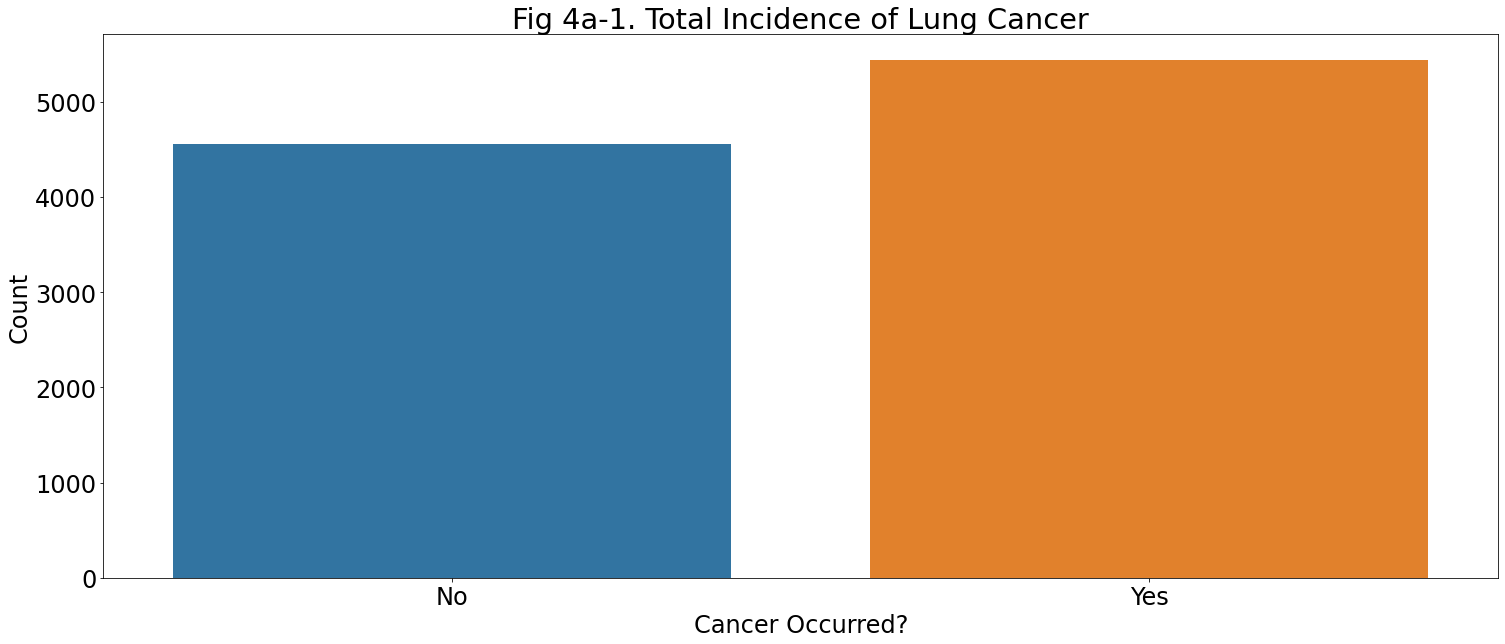

In [29]:
# Looking at lung cancer occurrence

sns.countplot(x = 'lung_cancer_occurrence', data = df)
plt.title("Fig 4a-1. Total Incidence of Lung Cancer")
plt.xlabel("Cancer Occurred?")
plt.ylabel("Count")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

**Observations**
- Fig 4a-1 shows a higher ratio of occurrences to non-occurrences of lung cancer, which is likely much greater than the general population. This could imply either:

    1. The dataset is not a random sample of the public hospital population, and oversamples lung cancer patients. 
    2. The dataset is a random sample of the public hospital population, but the incidence of lung cancer in registered public hospital patients is very high.  
    

- For the purposes of the exercise, we will assume that 1 is true, and that the sample is that of admitted patients that were referred for lung cancer testing based on preliminary medical assessment of the patient's symptoms/history. This suggests that all conclusions made from this dataset will apply only to this subset of cases, rather than being generally applicable to the wider population.

### 4b. Impact of Gender on Lung Cancer Occurrence

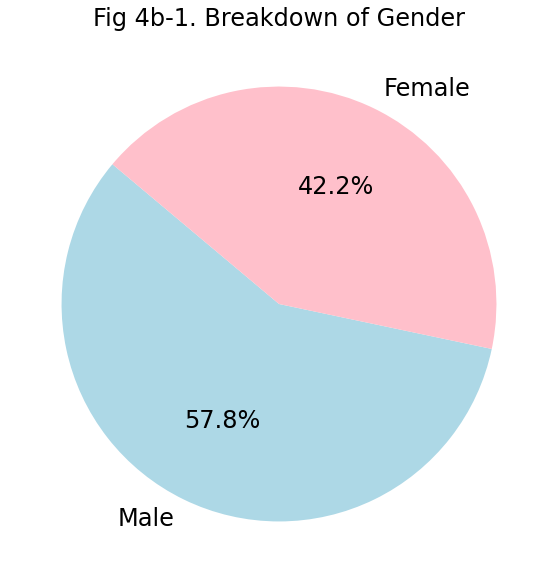

In [30]:
# Show Gender breakdown 

plt.figure(figsize=(25,10))
plt.title("Fig 4b-1. Breakdown of Gender", fontsize = 24)
plt.pie(df.gender.value_counts(), labels = df.gender.value_counts().index, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 24}, colors = ["lightblue", "pink"])
plt.show()

Across the dataset population, the gender ratio is roughly similar, at 58% men to 42% women. This is a reversal of the overall population gender ratio of 950 males to 1000 females [[1]](https://www.singstat.gov.sg/find-data/search-by-theme/population/population-and-population-structure/latest-data) and may be an artifact of synthetic data or suggest that more males are likely to be hospitalised for disease than females.

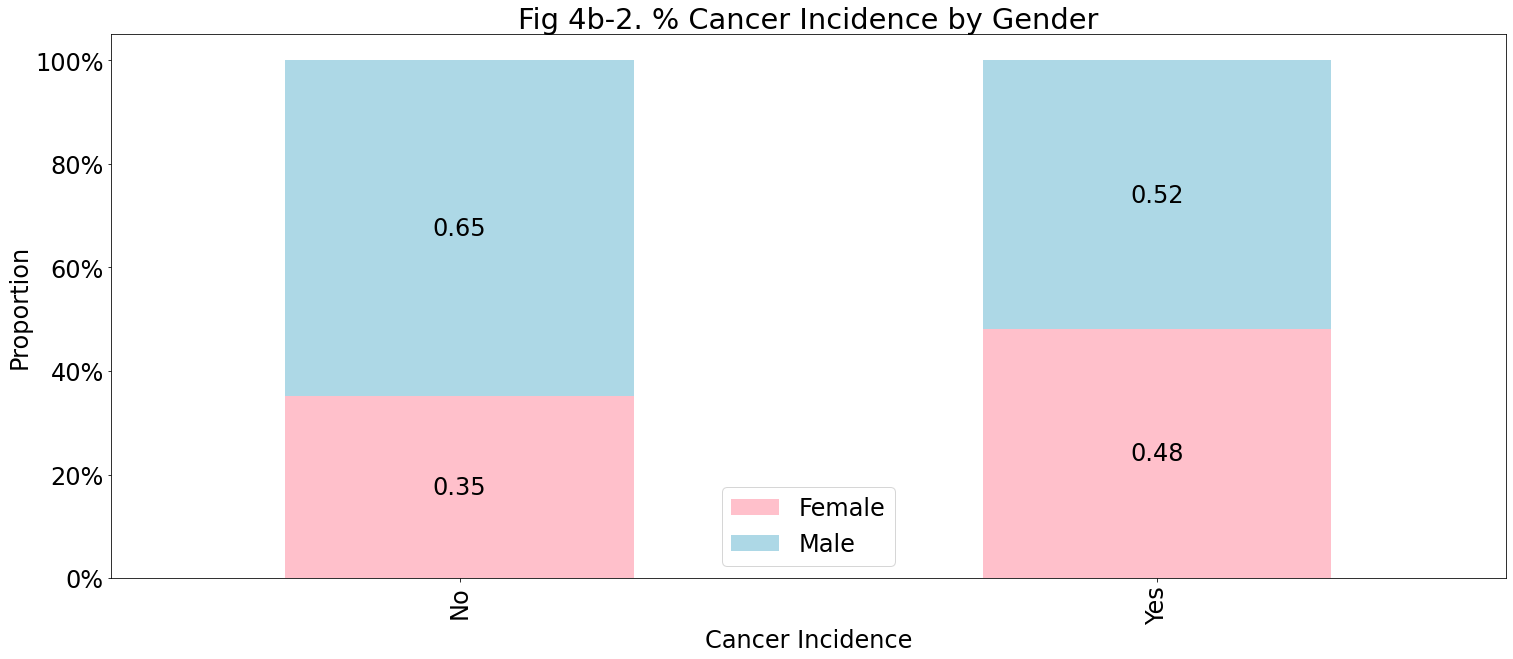

In [31]:
# Relationship between gender and lung cancer occurrence

df_4b1 = reformat_df("lung_cancer_occurrence", "gender")
ax_4b1 = df_4b1.plot(kind='bar', stacked=True, color = ['pink', 'lightblue'])
plt.title('Fig 4b-2. % Cancer Incidence by Gender')
plt.xlabel('Cancer Incidence')
plt.ylabel('Proportion')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x * 100:.0f}%')
plt.xticks([0,1], ["No", "Yes"])
plt.legend()

for c in ax_4b1.containers:
    ax_4b1.bar_label(c, label_type='center',  fmt= '%.2f')

plt.show()

In [32]:
# Chi-sqared test on gender and cancer incidence
chisq("lung_cancer_occurrence", "gender")

 gender: Significant Association for p-value of 3.1869183537061886e-38


**Observations**
- Fig 4b-2 shows that women make up 48% of those diagnosed with lung cancer, somewhat higher than the general sample population proportion of 42% (see Fig 4b-1).
- The chi-squared correlation test suggests that this is a a significant association between the variables.
- This is a surprising result, given the general incidence of lung cancer is twice as high in males than in females in Singapore [[2]](https://pubmed.ncbi.nlm.nih.gov/24560333/#:~:text=Results%3A%20Lung%20cancer%20incidence%20rates,Malay%20men%20continued%20to%20increase). 
- This could be because of the synthetic nature of the data, or due to some aspect of the sampling process that oversamples women with lung cancer. 

### 4c. Impact of COPD History on Lung Cancer Occurrence

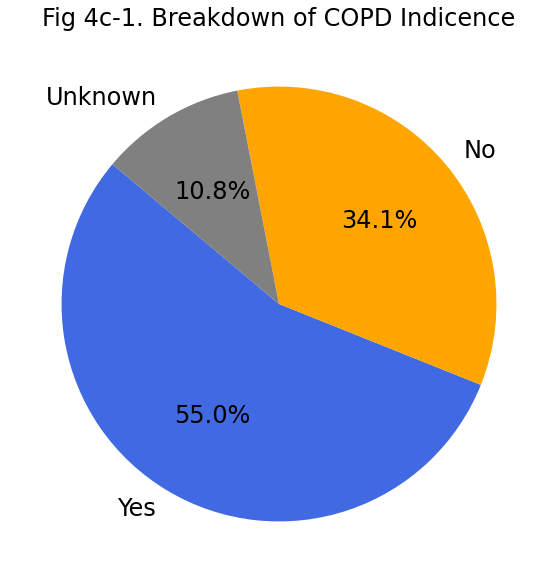

In [33]:
# Show COPD History breakdown 

plt.figure(figsize=(25,10))
plt.title("Fig 4c-1. Breakdown of COPD Indicence", fontsize = 24)
plt.pie(df.copd_history.value_counts(), labels = df.copd_history.value_counts().index, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 24}, colors = ["royalblue", "orange", "gray"])

plt.show()

Across the sample population, the % of persons with history of COPD is about 55%, with 34% without and 11% unknown.

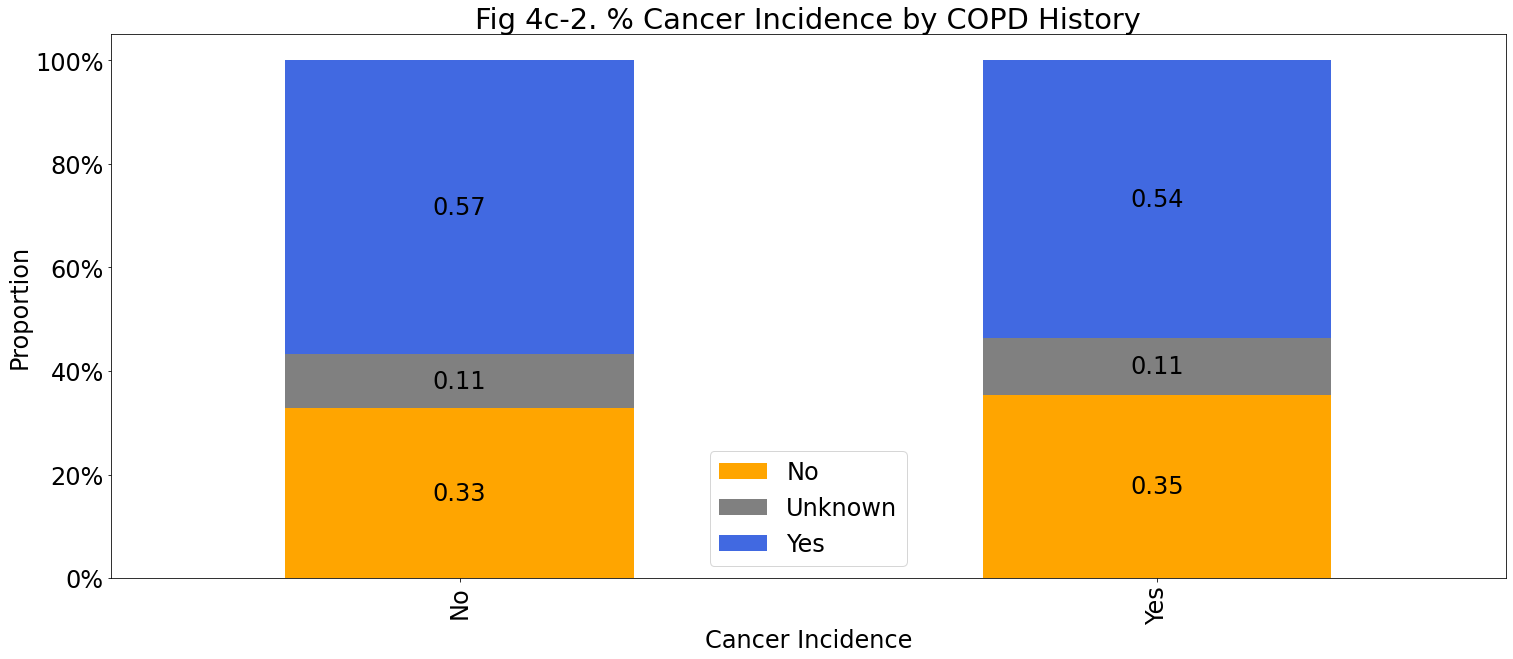

In [34]:
# Relationship between COPD history and lung cancer occurrence

df_4c1 = reformat_df("lung_cancer_occurrence", "copd_history")
ax_4c1 = df_4c1.plot(kind='bar', stacked=True, color = ["orange","gray", "royalblue"])
plt.title('Fig 4c-2. % Cancer Incidence by COPD History')
plt.xlabel('Cancer Incidence')
plt.ylabel('Proportion')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x * 100:.0f}%')
plt.xticks([0,1], ["No", "Yes"])
plt.legend()

for c in ax_4c1.containers:
    ax_4c1.bar_label(c, label_type='center',  fmt= '%.2f')

plt.show()

In [35]:
# Chi-sqared test on COPD history and cancer incidence
chisq("lung_cancer_occurrence", "copd_history")

 copd_history: Significant Association for p-value of 0.009519611889290625


**Observations**
- Fig 4c-2 shows that COPD history distribution seems to be similar between sufferers and non-sufferers of cancer, and is also similar to the sample population mean.
- However, chi-squared test shows a significant association between the two variables.
- This suggests that COPD history may have a small but statistically significant impact on decreasing cancer incidence.

### 4d. Impact of Genetic Markers on Lung Cancer Occurrence

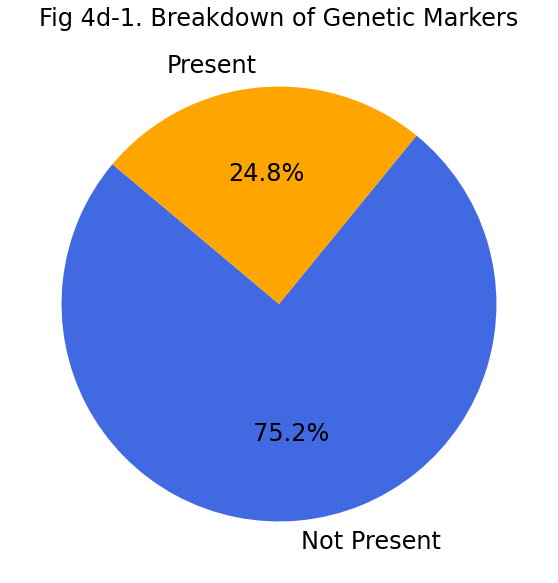

In [36]:
# Show genetic markers breakdown 

plt.figure(figsize=(25,10))
plt.title("Fig 4d-1. Breakdown of Genetic Markers", fontsize = 24)
plt.pie(df.genetic_markers.value_counts(), labels = df.genetic_markers.value_counts().index, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 24}, colors = ["royalblue", "orange", "gray"])

plt.show()

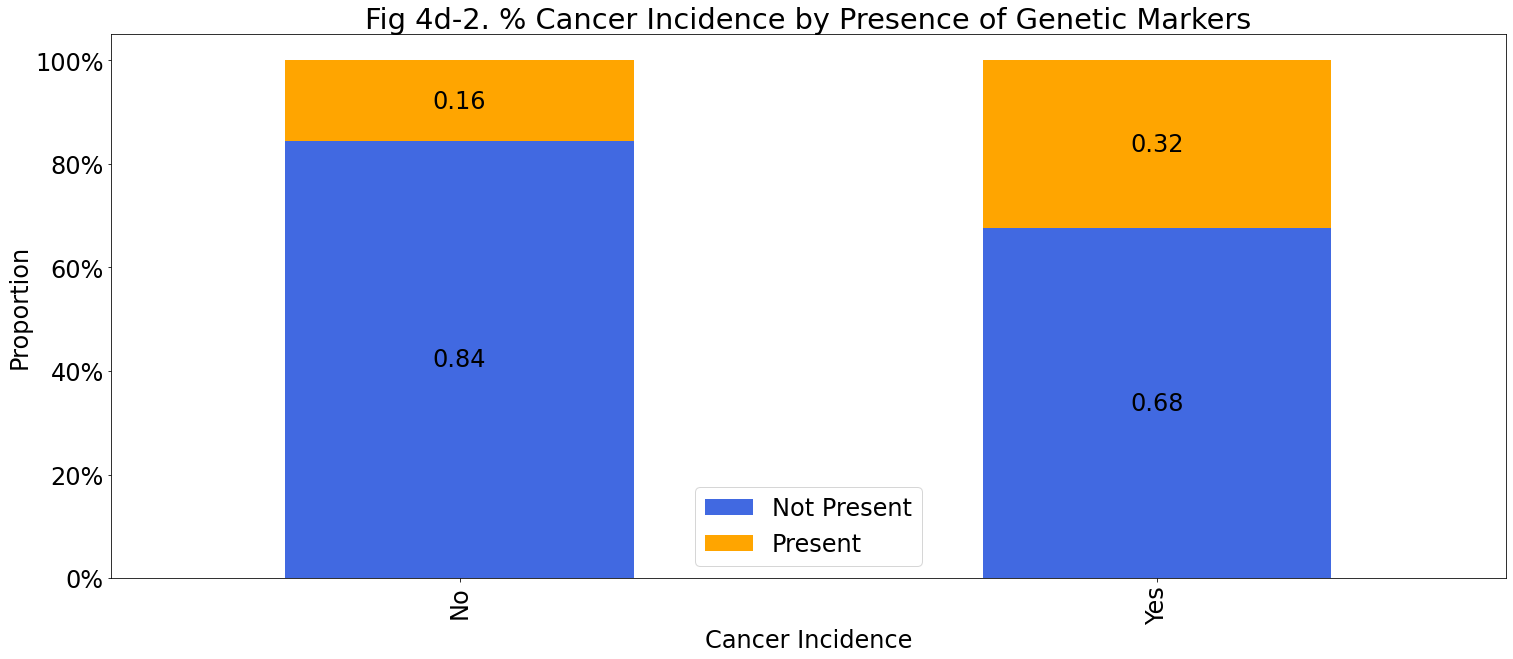

In [37]:
# Relationship between presence of genetic markers and lung cancer occurrence

df_4d2 = reformat_df("lung_cancer_occurrence", "genetic_markers")
ax_4d2 = df_4d2.plot(kind='bar', stacked=True, color = ["royalblue", "orange"])
plt.title('Fig 4d-2. % Cancer Incidence by Presence of Genetic Markers')
plt.xlabel('Cancer Incidence')
plt.ylabel('Proportion')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x * 100:.0f}%')
plt.xticks([0,1], ["No", "Yes"])
plt.legend()

for c in ax_4d2.containers:
    ax_4d2.bar_label(c, label_type='center',  fmt= '%.2f')

plt.show()

In [38]:
# Chi-sqared test on genetic markers and cancer incidence
chisq("lung_cancer_occurrence", "genetic_markers")

 genetic_markers: Significant Association for p-value of 3.0641929533482635e-83


**Observations**
- Figs 4d-1 and 4d-2 show that people with genetic markers are overrepresented in the cohort with cancer incidence (32%) relative to the sample mean (25%). 
- Chi-square test also suggests significant association. 
- This could suggest a positive correlation between the presence of the genetic marker and cancer incidence. 

### 4e. Impact of Air Pollution Exposure on Lung Cancer Occurrence

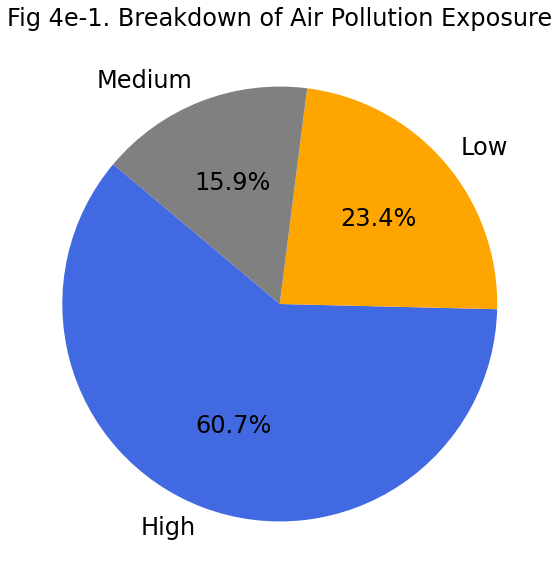

In [39]:
# Show  air pollution exposure breakdown 

plt.figure(figsize=(25,10))
plt.title("Fig 4e-1. Breakdown of Air Pollution Exposure", fontsize = 24)
plt.pie(df.air_pollution_exposure.value_counts(), labels = df.air_pollution_exposure.value_counts().index, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 24}, colors = ["royalblue", "orange", "gray"])

plt.show()

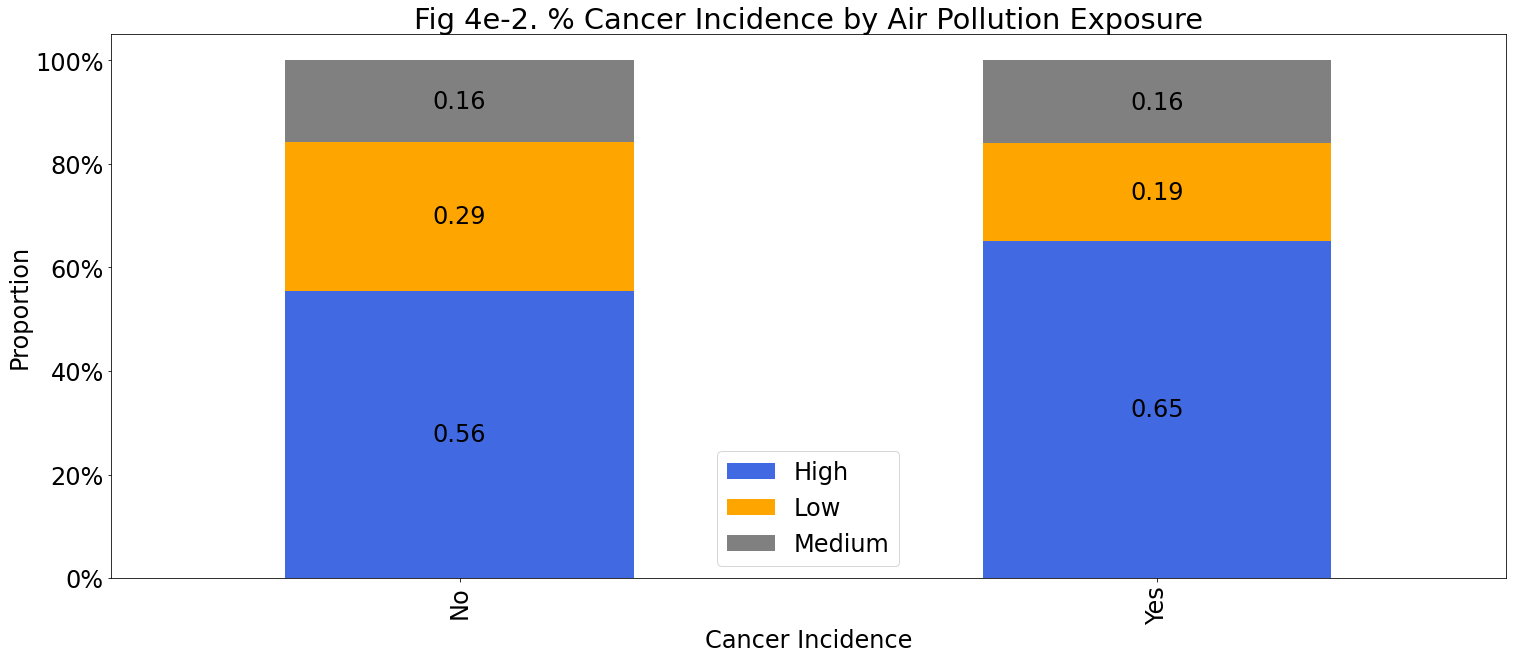

In [40]:
# Relationship between air pollution exposure and lung cancer occurrence

df_4e2 = reformat_df("lung_cancer_occurrence", "air_pollution_exposure")
ax_4e2 = df_4e2.plot(kind='bar', stacked=True, color = ["royalblue", "orange", "grey"])
plt.title('Fig 4e-2. % Cancer Incidence by Air Pollution Exposure')
plt.xlabel('Cancer Incidence')
plt.ylabel('Proportion')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x * 100:.0f}%')
plt.xticks([0,1], ["No", "Yes"])
plt.legend()

for c in ax_4e2.containers:
    ax_4e2.bar_label(c, label_type='center',  fmt= '%.2f')

plt.show()

In [41]:
# Chi-sqared test on genetic markers and cancer incidence
chisq("lung_cancer_occurrence", "air_pollution_exposure")

 air_pollution_exposure: Significant Association for p-value of 1.2034482498978936e-31


**Observations**
- Figs 4e-1 and 4e-2 show that people a greater percentage of people with cancer incidence are exposed to high rates of air pollution than the sample mean and the people with no cancer. 
- Chi-square test also suggests significant association between the variables. 
- This could suggest a positive correlation between high air pollution levels and cancer incidence, though not for medium and lower air pollution. 

### 4f. Impact of Bronchodilator Use on Lung Cancer Occurrence

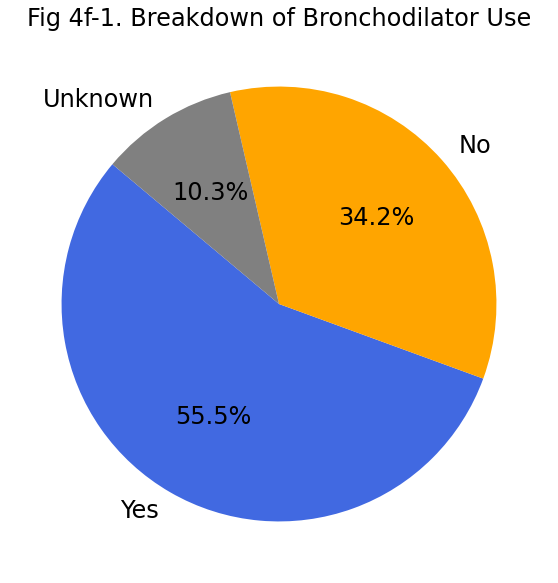

In [42]:
# Show  bronchodilator use breakdown 

plt.figure(figsize=(25,10))
plt.title("Fig 4f-1. Breakdown of Bronchodilator Use", fontsize = 24)
plt.pie(df.taken_bronchodilators.value_counts(), labels = df.taken_bronchodilators.value_counts().index, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 24}, colors = ["royalblue", "orange", "gray"])

plt.show()

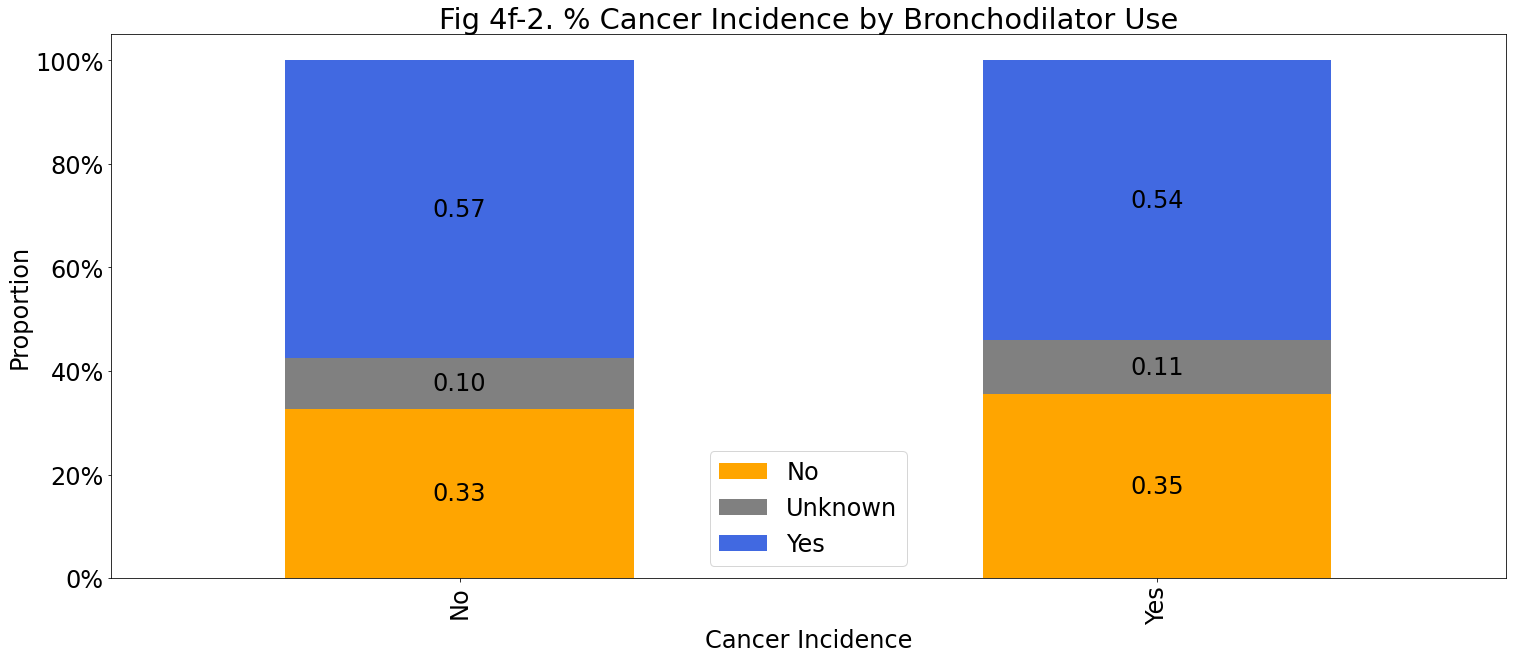

In [43]:
# Relationship between air pollution exposure and lung cancer occurrence

df_4f2 = reformat_df("lung_cancer_occurrence", "taken_bronchodilators")
ax_4f2 = df_4f2.plot(kind='bar', stacked=True, color = ["orange", "grey", "royalblue"])
plt.title('Fig 4f-2. % Cancer Incidence by Bronchodilator Use')
plt.xlabel('Cancer Incidence')
plt.ylabel('Proportion')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x * 100:.0f}%')
plt.xticks([0,1], ["No", "Yes"])
plt.legend()

for c in ax_4f2.containers:
    ax_4f2.bar_label(c, label_type='center',  fmt= '%.2f')

plt.show()

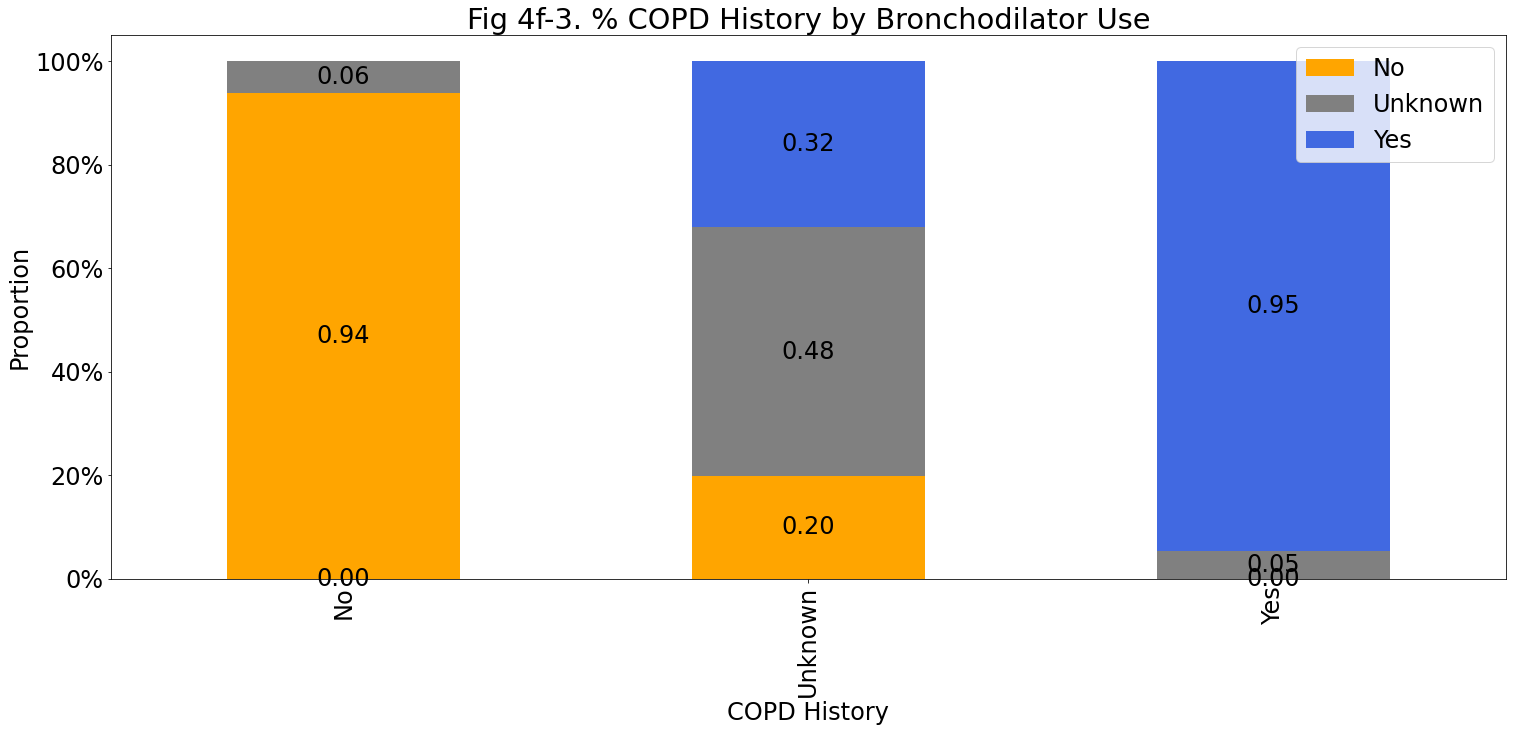

In [44]:
# Relationship between air pollution exposure and lung cancer occurrence

df_4f3 = reformat_df("copd_history", "taken_bronchodilators")
ax_4f3 = df_4f3.plot(kind='bar', stacked=True, color = ["orange", "grey", "royalblue"])
plt.title('Fig 4f-3. % COPD History by Bronchodilator Use')
plt.xlabel('COPD History')
plt.ylabel('Proportion')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x * 100:.0f}%')
plt.legend()

for c in ax_4f3.containers:
    ax_4f3.bar_label(c, label_type='center',  fmt= '%.2f')

plt.show()

In [45]:
# Chi-sqared test on brochodilator use and cancer incidence
chisq("lung_cancer_occurrence", "taken_bronchodilators")

 taken_bronchodilators: Significant Association for p-value of 0.00249881658327521


**Observations**
- Figs 4f-1 and 4f-2 shows that bronchodilator use seems to be similar between sufferers and non-sufferers of cancer, and is also similar to the distribution of those with COPD, which is not surprising since COPD incidence would be highly correlated with the use of bronchodilators (4f-3) as a form of treatment. 

### 4g. Impact of Smoking Status on Lung Cancer Occurrence

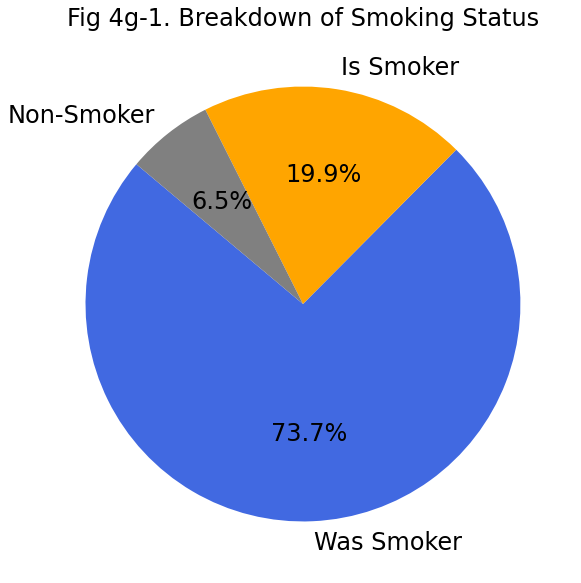

In [53]:
# Show  smoking status breakdown 

plt.figure(figsize=(25,10))
plt.title("Fig 4g-1. Breakdown of Smoking Status", fontsize = 24)
plt.pie(df.smoker_status.value_counts(), labels = df.smoker_status.value_counts().index, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 24}, colors = ["royalblue", "orange", "gray"])

plt.show()

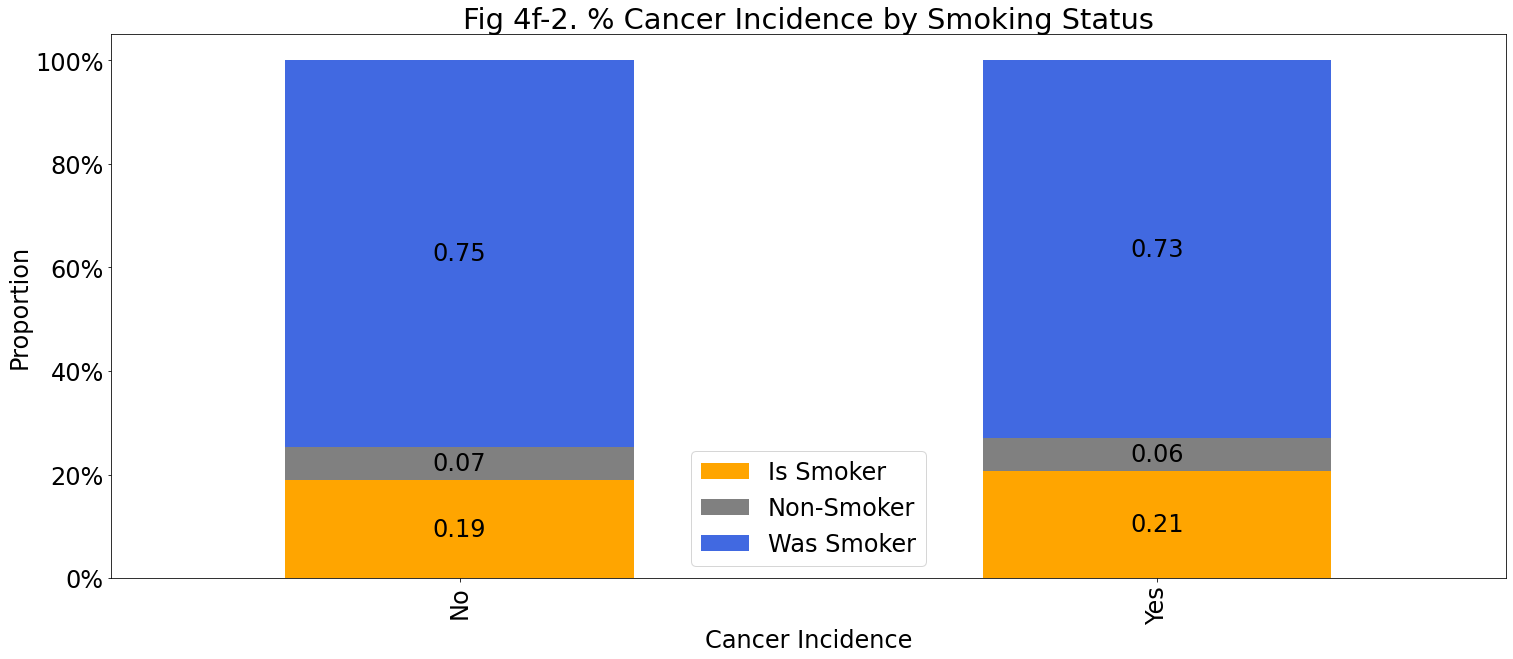

In [54]:
# Relationship between smoking status and lung cancer occurrence

df_4g2 = reformat_df("lung_cancer_occurrence", "smoker_status")
ax_4g2 = df_4g2.plot(kind='bar', stacked=True, color = ["orange", "grey", "royalblue"])
plt.title('Fig 4g-2. % Cancer Incidence by Smoking Status')
plt.xlabel('Cancer Incidence')
plt.ylabel('Proportion')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x * 100:.0f}%')
plt.xticks([0,1], ["No", "Yes"])
plt.legend()

for c in ax_4g2.containers:
    ax_4g2.bar_label(c, label_type='center',  fmt= '%.2f')

plt.show()

In [55]:
# Chi-sqared test on smoking status and cancer incidence
chisq("lung_cancer_occurrence", "smoker_status")

 smoker_status: No Significant Association for p-value of 0.07947271115012422


**Observations**
- Figs 4g-1 and 4g-2 show that the synthetic categorical variable of smoking status doesn't appear to have a significant impact on this cohort in terms of cancer incidence
- Chi-square test also suggests no significant association.
- This may suggest that by the time the cohort comes in for testing they are already preselected for telltale signs of cancer incidence and that the smoking status is no longer relevant. This is also given that there are relatively few non-smokers in the sample, so it could imply that the sample was already pre-selected for cancer testing based on their smoking status.

### 4h. Impact of Tiredness Frequency on Lung Cancer Occurrence

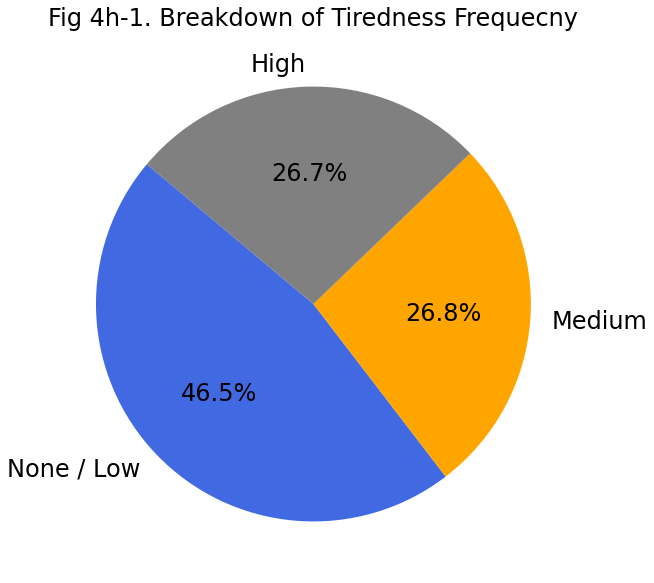

In [70]:
# Show  tiredness frequency breakdown 

plt.figure(figsize=(25,10))
plt.title("Fig 4h-1. Breakdown of Tiredness Frequecny", fontsize = 24)
plt.pie(df.frequency_of_tiredness.value_counts(), labels = df.frequency_of_tiredness.value_counts().index, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 24}, colors = ["royalblue", "orange", "gray"])

plt.show()

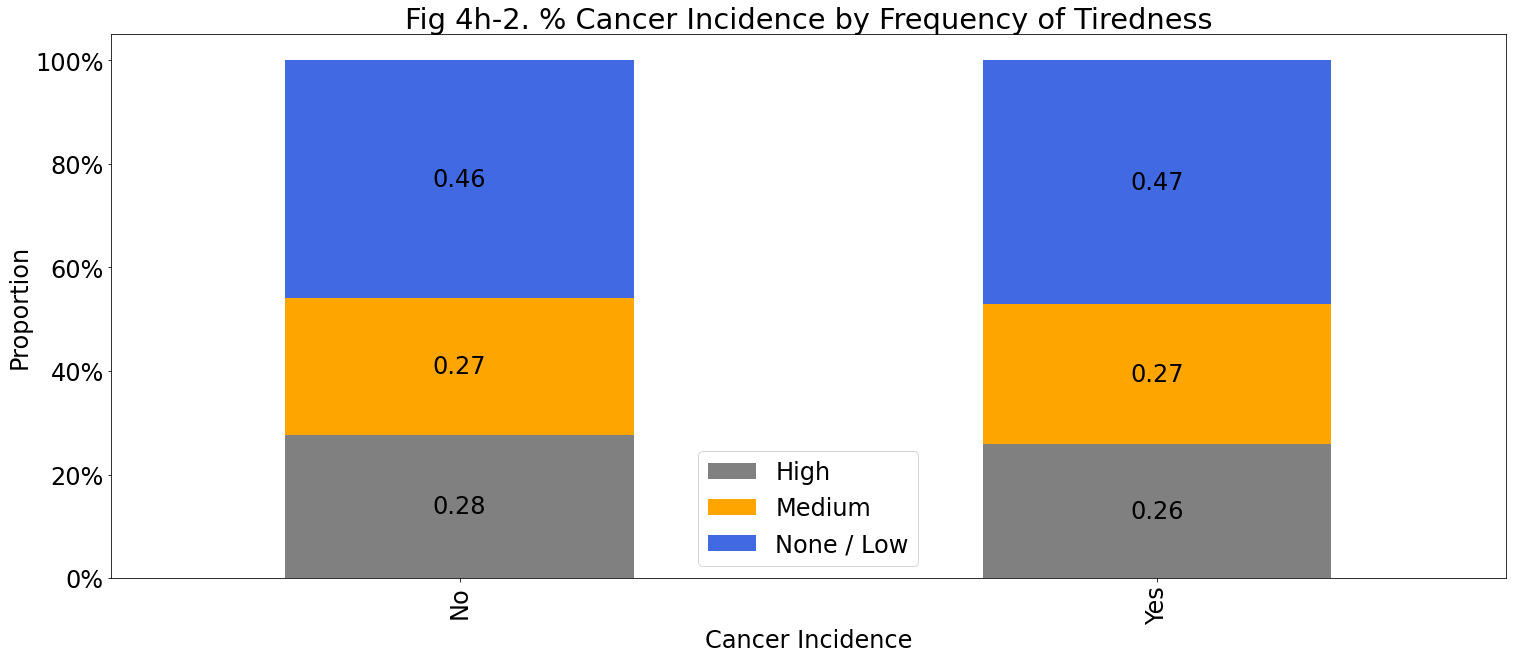

In [71]:
# Relationship between tiredness frequency and lung cancer occurrence

df_4h2 = reformat_df("lung_cancer_occurrence", "frequency_of_tiredness")
ax_4h2 = df_4h2.plot(kind='bar', stacked=True, color = ["grey","orange", "royalblue"])
plt.title('Fig 4h-2. % Cancer Incidence by Frequency of Tiredness')
plt.xlabel('Cancer Incidence')
plt.ylabel('Proportion')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x * 100:.0f}%')
plt.xticks([0,1], ["No", "Yes"])
plt.legend()

for c in ax_4h2.containers:
    ax_4h2.bar_label(c, label_type='center',  fmt= '%.2f')

plt.show()

In [56]:
# Chi-sqared test on brochodilator use and cancer incidence
chisq("lung_cancer_occurrence", "frequency_of_tiredness")

 frequency_of_tiredness: No Significant Association for p-value of 0.19237270701471543


**Observations**
- Figs 4h-1 and 4h-2 show that frequency of tiredness doesn't appear to have a significant impact on this cohort in terms of cancer incidence
- Chi-square test also suggests no significant association.
- This suggests frequency of tireness has no significant correlation with cancer incidence.

### 4i. Impact of Handedness on Lung Cancer Occurrence

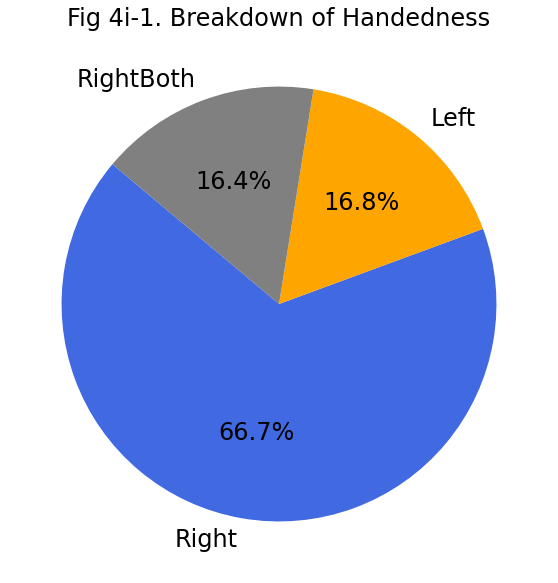

In [64]:
# Show  dominant hand breakdown

plt.figure(figsize=(25,10))
plt.title("Fig 4i-1. Breakdown of Handedness", fontsize = 24)
plt.pie(df.dominant_hand.value_counts(), labels = df.dominant_hand.value_counts().index, 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 24}, colors = ["royalblue", "orange", "gray"])

plt.show()

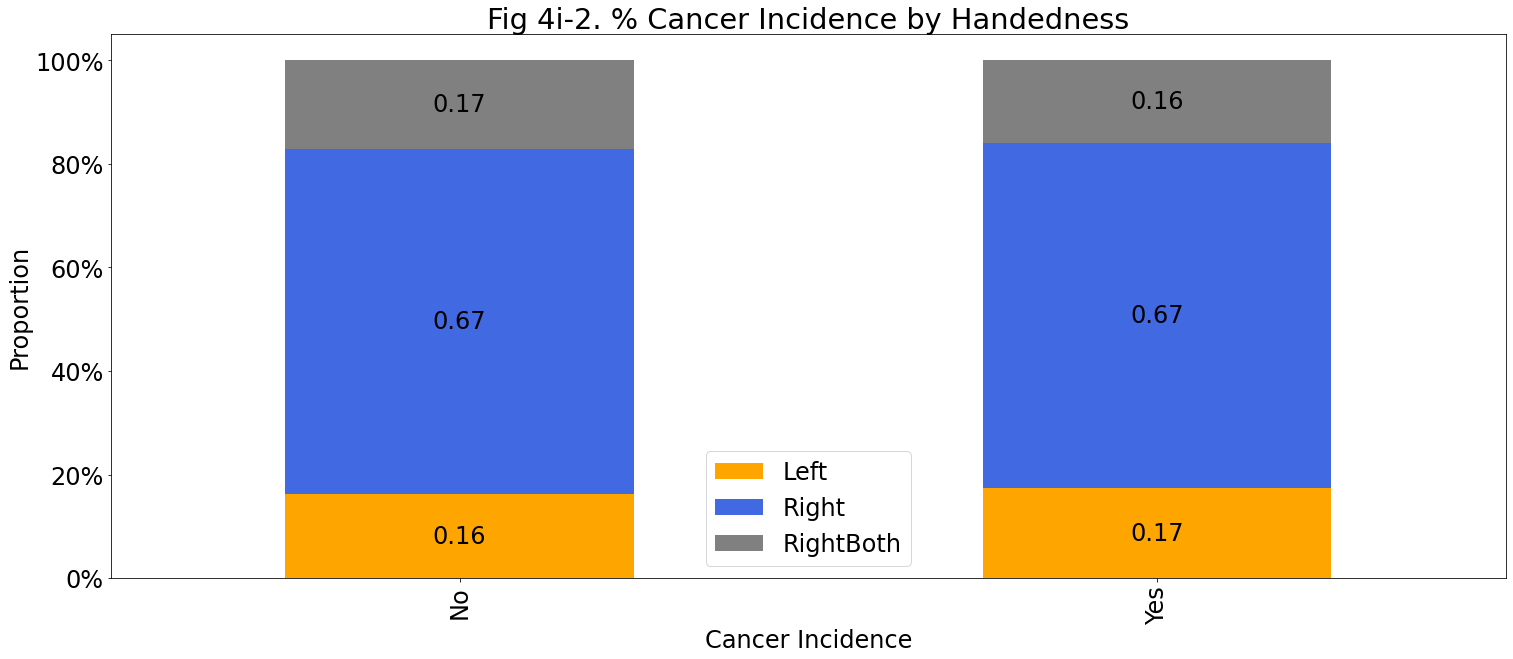

In [69]:
# Relationship between tiredness frequency and lung cancer occurrence

df_4i2 = reformat_df("lung_cancer_occurrence", "dominant_hand")
ax_4i2 = df_4i2.plot(kind='bar', stacked=True, color = ["orange","royalblue", "grey"])
plt.title('Fig 4i-2. % Cancer Incidence by Handedness')
plt.xlabel('Cancer Incidence')
plt.ylabel('Proportion')
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x * 100:.0f}%')
plt.xticks([0,1], ["No", "Yes"])
plt.legend()

for c in ax_4i2.containers:
    ax_4i2.bar_label(c, label_type='center',  fmt= '%.2f')

plt.show()

In [59]:
# Chi-sqared test on brochodilator use and cancer incidence
chisq("lung_cancer_occurrence", "dominant_hand")

 dominant_hand: No Significant Association for p-value of 0.14731974285478266


**Observations**
- Figs 4i-1 and 4i-2 show that the handedness doesn't appear to have a significant impact on this cohort in terms of cancer incidence
- Chi-square test also suggests no significant association.
- This may suggest that the variables are not correlated. 

### Analyses of Numerical Features on Lung Cancer Occurrence<a id='4-2'></a>
[Return to Part 4](#4)

### 4j. Summary Statistics and Normality Testing of Numerical Variables

In [46]:
# Summary stats of numerical features

summary = df.describe()
summary

,age,last_weight,current_weight,lung_cancer_occurrence,no_yrs_smoked,no_yrs_stopped,weight_change
count,9990.00,9990.00,9990.00,9990.00,9990.00,9990.00,9990.00
mean,64.04,72.38,69.41,0.54,17.66,35.01,-2.98
std,14.22,16.13,16.88,0.50,17.06,22.48,6.71
min,18.00,45.00,36.00,0.00,0.00,0.00,-20.00
25%,54.00,59.00,56.00,0.00,4.00,17.00,-8.00
50%,64.00,72.00,69.00,1.00,13.00,33.00,-3.00
75%,74.00,86.00,82.00,1.00,27.00,50.00,2.00
max,110.00,100.00,115.00,1.00,91.00,110.00,15.00


In [47]:
# Get list of numerical independent variable columns, based on the results of the summary table above

numeric_features = list(summary.columns)
numeric_features.remove('lung_cancer_occurrence')

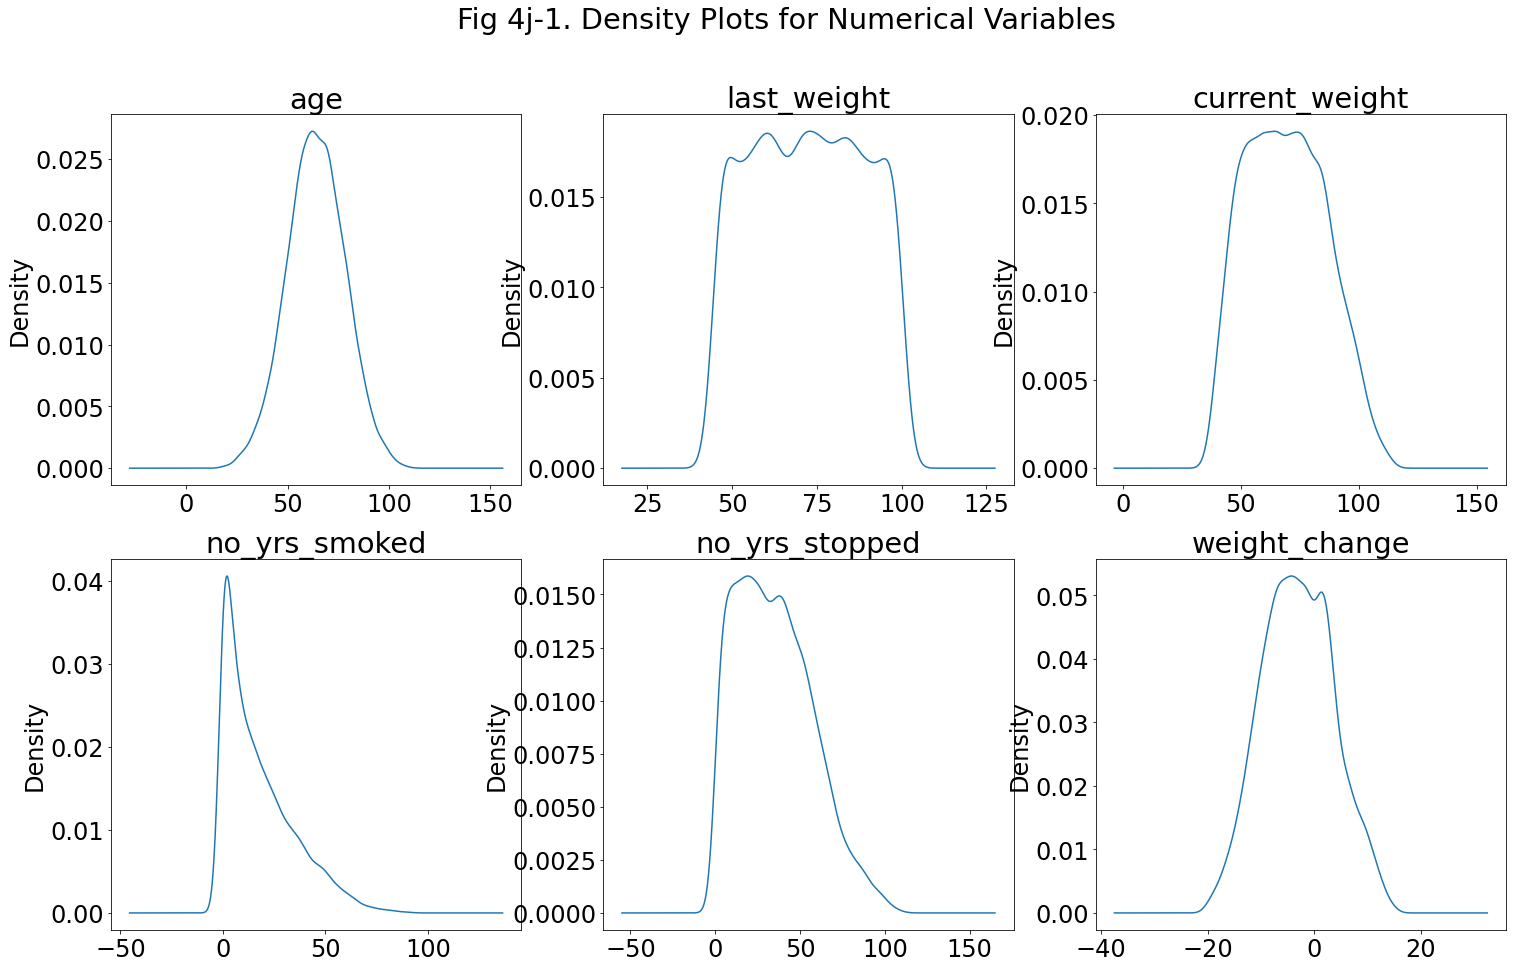

In [77]:
# Density plot of distribution of numerical features

fig,ax = plt.subplots(2,3,figsize=(25,15))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1
plt.suptitle("Fig 4j-1. Density Plots for Numerical Variables")
plt.show()

In [49]:
# Use Pearson test from scipy to determine if numeric features have gaussian distribution based on p-value of 0.05

for i in numeric_features:
    print(f'{i}: {"Not Gaussian" if normaltest(df[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(df[i].values)}')

age: Gaussian  NormaltestResult(statistic=4.424358046849194, pvalue=0.10946186848082726)
last_weight: Not Gaussian  NormaltestResult(statistic=7324.353640055543, pvalue=0.0)
current_weight: Not Gaussian  NormaltestResult(statistic=872.992468065647, pvalue=2.704544851031371e-190)
no_yrs_smoked: Not Gaussian  NormaltestResult(statistic=1525.4579773026446, pvalue=0.0)
no_yrs_stopped: Not Gaussian  NormaltestResult(statistic=471.9754164941536, pvalue=3.2496793544653523e-103)
weight_change: Not Gaussian  NormaltestResult(statistic=156.3940242951709, pvalue=1.0951386915658013e-34)


Using the 4j-1 and the results of test, it appears that:
- Only **age** has a normal distribution. 
- **last_weight** is a uniform distribution 
- **no_yrs_smoked** and **no_yrs_stopped** are skewed towards the left. 
- **current weight**, and **weight_change** appear gaussian but may have some small skew to the left as well. 

- It is not surprising that **no_yrs_smoked** and **no_yrs_stopped** are skewed, as a large proportion of this cohort are non-smokers with a no. yrs smoked value of 0 and a no_yrs_stopped value equivalent to their age.
- There may be merit to apply transformations to the other variables to normalise them, in order to improve the performance of some of the models that we might consider running.

### 4k - Visualising Relationships Between Numeric Variables and Lung Cancer Occurrence

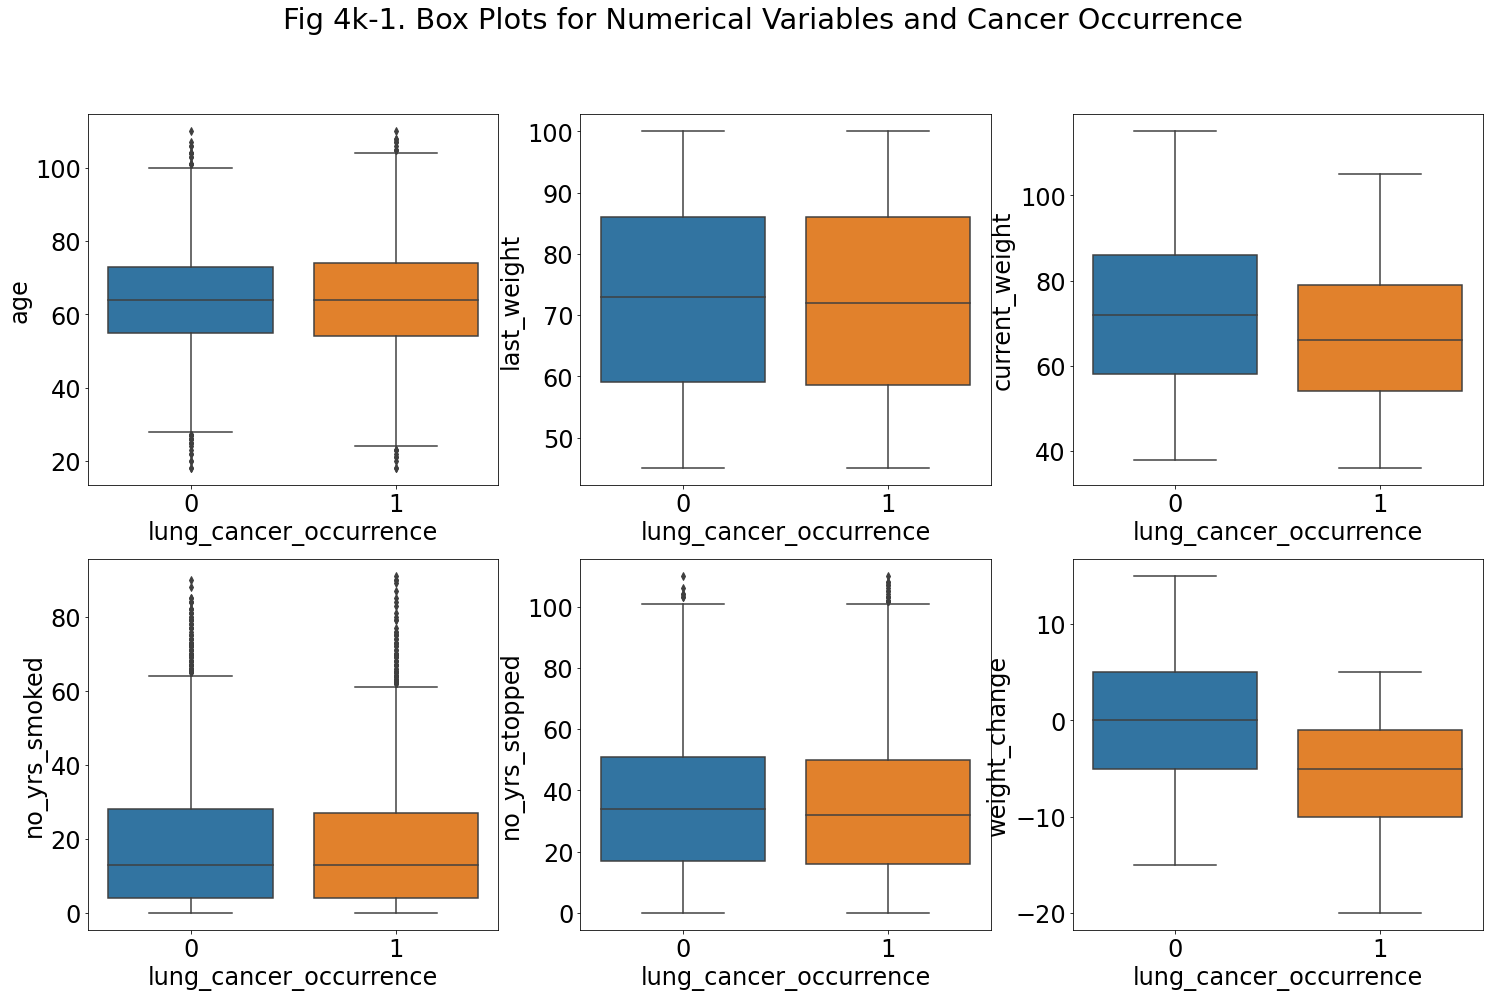

In [79]:
# Boxplots 

fig,ax = plt.subplots(2,3,figsize=(25,15))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.boxplot(x="lung_cancer_occurrence",y=i,data=df,ax=ax[row,col])
    col += 1
    
plt.suptitle("Fig 4k-1. Box Plots for Numerical Variables and Cancer Occurrence")
plt.show()

**Observations**
- Fig 4k-1 shows that out of all the numeric values, there seems to be a significant correlation between **current_weight** and **weight_change** and lung cancer occurrence. 
- Persons with a positive diagnosis seem to have a lower average weight and a large negative weight change (weight loss) than those without.  

<AxesSubplot:>

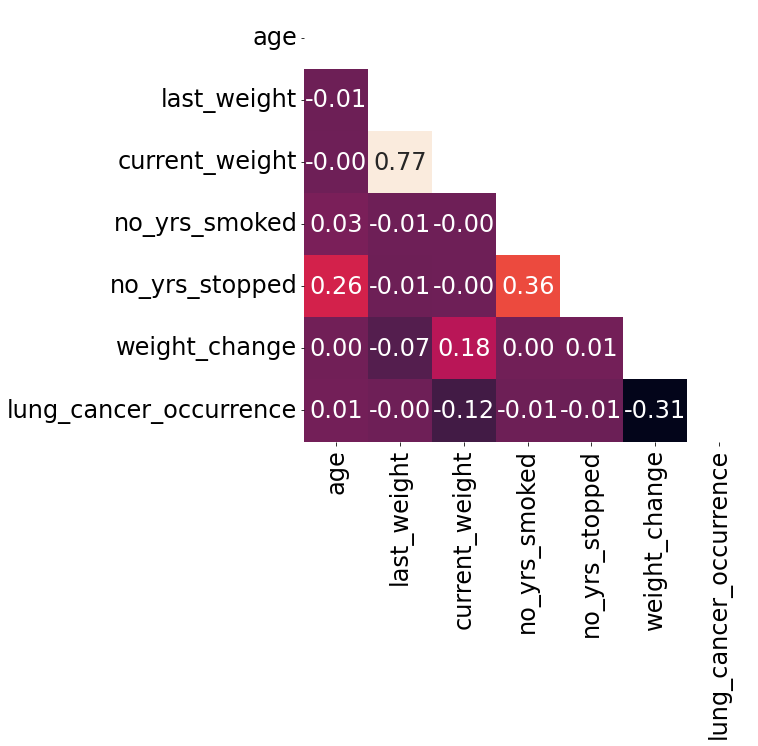

In [80]:
# Running kendall test to determine monotonic relationships between variables. Kendall is used because the numeric variables 
# are mostly non-gaussian

num_with_dep_var = numeric_features.copy() 
num_with_dep_var.append('lung_cancer_occurrence')
fig = plt.figure(figsize=(8,8))
sns.heatmap(df[num_with_dep_var].corr(method='kendall'),annot=True,fmt='.2f',mask=np.triu(df[num_with_dep_var].corr(method='pearson')),cbar=False)

**Observations**
- Based on the correlation matrix, **lung_cancer_occurrence** appears most negatively correlated with weight change and current weight. 

## 5. Conclusions <a id='5'></a>
[Return to Table of Contents](#0)

### Insights

Based on the EDA of the provided dataset, we can make some preliminary conclusions and assumptions:

1. The data is a non-random subsample of hospital patients, likely filtered for cancer testing based on pre-existing lifestyle, genetic and phenotypic factors. We can see this from the high incidence of positive cancer cases in the sample, as well as the fact that many of the categorical variables are not reflective of the population mean (gender, smoker status, history of COPD). 

2. Based on EDA of categorical and numerical variables, we can make some preliminary guesses at significant factors that bear further study and inclusion in the ML predictive model:

- Significant Categorical variables: 

**Gender:** Patients that test positive for cancer in the pre-selected sample are more likely to be female than the population average. This suggests something about the preliminary screening process that is very good at picking up signals of cancer in female patients. 

**Genetic Markers:** Patients that test positive are more likely to have the necessary genetic markers than average.

**Air Pollution Exposure:** Patients that test positive are more likely to had suffered from high air pollution exposure than the average.

**COPD History and Bronchodilator Use:** Patients that test positive are slightly less likely to have been diagnosted with history of COPD and use of bronchodilators. This could mean that either having a history of COPD or bronchodilators may have a slight but significant negative effect on cancer incidence. It could also mean that since symptoms of the two are similar and co-occuring, the prelim screening process may have overselected for COPD sufferers that present similar symptoms but do not have cancer, thus pushing down cancer incidence in the selected cohort. 

- Non-significant Categorical variables:

**Smoking Status** Smoking status did not seem to have a significant impact, which suggests that by the time they are pre-selected, that smoking history is no longer as relevant. 

**Handedness, Tiredness Frequency** Appear not to be relevant factors. 

- Significant Numerical variables:

Out of all numerical variables, current weight and negative weight change are most correlated with presence of cancer in patients. 